# Analysis of weekday prices

It seems that stock prices have tendency to go up on Mondays and go down Friday.
Here is quick analysis of weekday prices in 2015-2020

In [8]:
from analysis import get_best_month_day

import numpy as np
import pandas as pd
from seaborn import lineplot, barplot, scatterplot, boxplot
from matplotlib import pyplot

pd.options.mode.chained_assignment = None

LIMIT = 5

df = get_best_month_day("sp500.csv", limit=LIMIT)

df

[*********************100%***********************]  5 of 5 completed
2021-05-10 14:41:42.769 | DEBUG    | analysis:_get_month_day_diffs:151 - Not enough data for ABT in 2010.12
2021-05-10 14:41:42.797 | DEBUG    | analysis:_get_month_day_diffs:151 - Not enough data for MMM in 2010.12
2021-05-10 14:41:42.819 | DEBUG    | analysis:_get_month_day_diffs:151 - Not enough data for AOS in 2010.12
2021-05-10 14:41:42.799 | DEBUG    | analysis:_get_month_day_diffs:151 - Not enough data for ABMD in 2010.12


,year,month,day,diff
503,2013,1,2,100.0
504,2013,1,3,100.2291
505,2013,1,4,99.140896
506,2013,1,7,97.794969
507,2013,1,8,98.195884
...,...,...,...,...
1989,2018,11,26,104.17607
1990,2018,11,27,104.464611
1991,2018,11,28,105.970308
1992,2018,11,29,106.95661


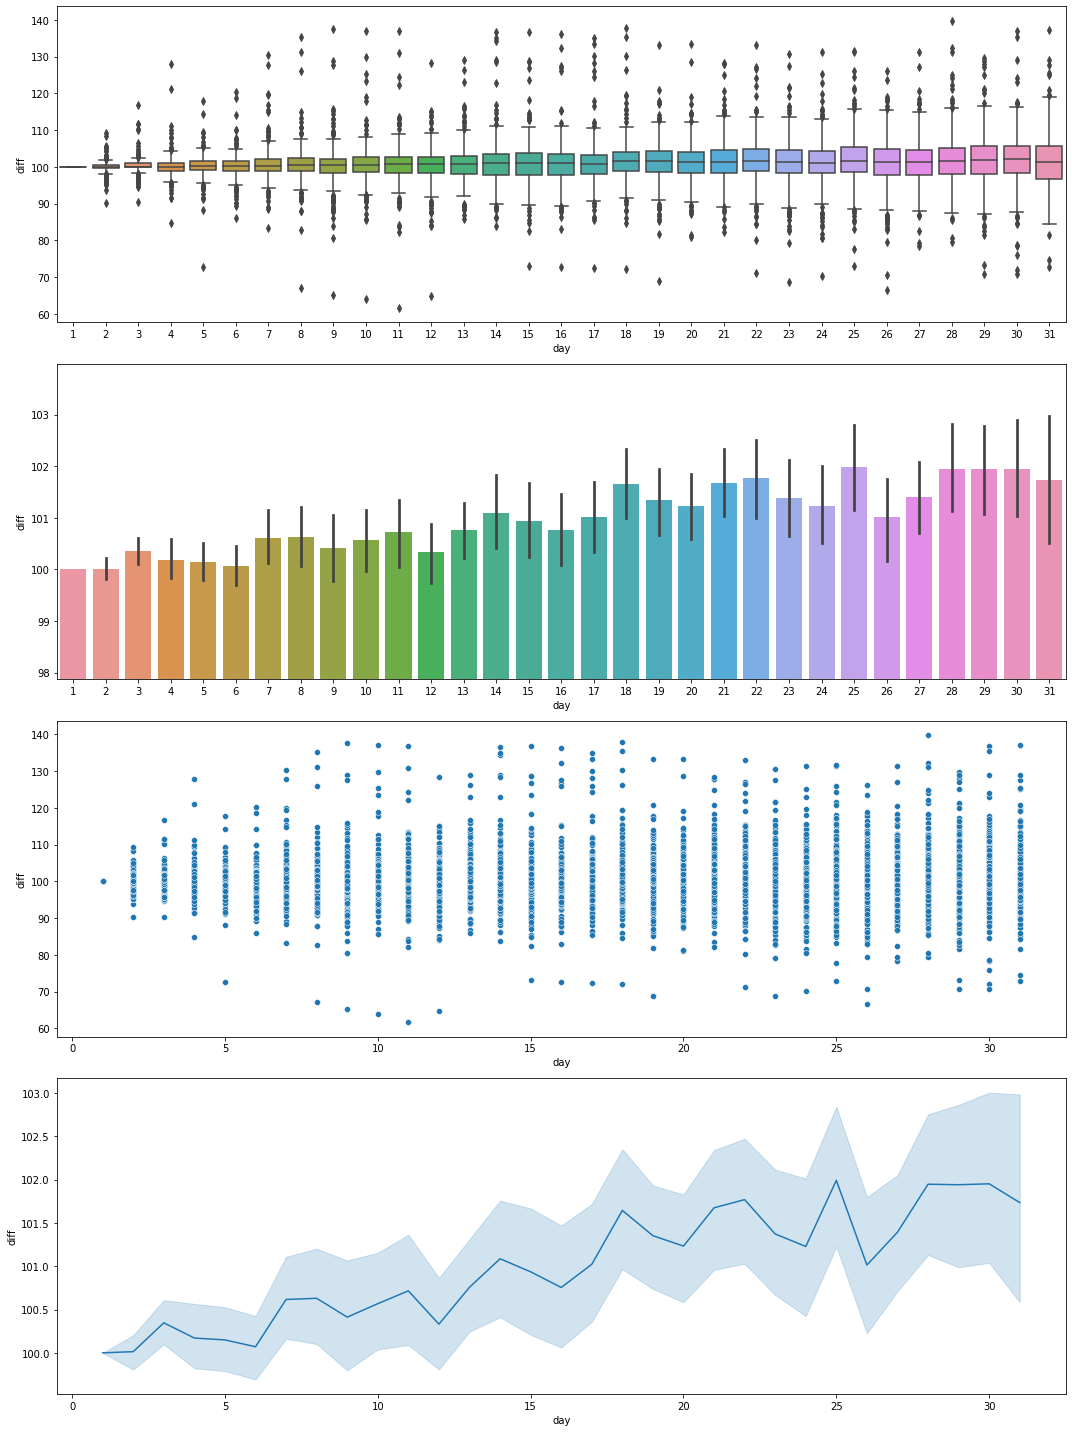

In [9]:
def plot(**kwargs):
    funcs = [boxplot, barplot, scatterplot, lineplot]
    # NOTE: after lineplot X will be float

    fig, axs = pyplot.subplots(nrows=len(funcs), figsize=(15,20))

    for i, func in enumerate(funcs):
        ax = axs[i]

        data = kwargs['data']
        x = kwargs['x']

        if func == lineplot:
            data[x] = data[x].astype(float)
        elif func == barplot:
            Y = data[kwargs['y']]
            ax.set_ylim(Y.quantile(0.20), Y.quantile(0.80))
            
        func(**kwargs, ax=ax)

    fig.tight_layout()

plot(x='day', y='diff', data=df)

In [10]:
from analysis import get_best_month

df = get_best_month("sp500.csv", limit=LIMIT)
df

[*********************100%***********************]  5 of 5 completed
2021-05-10 14:41:49.847 | DEBUG    | analysis:_get_monthly_diffs:107 - Not enough data for ABT in 2010
2021-05-10 14:41:49.816 | DEBUG    | analysis:_get_monthly_diffs:107 - Not enough data for ABMD in 2010
2021-05-10 14:41:49.859 | DEBUG    | analysis:_get_monthly_diffs:107 - Not enough data for AOS in 2010
2021-05-10 14:41:49.870 | DEBUG    | analysis:_get_monthly_diffs:107 - Not enough data for MMM in 2010


,year,month,diff
0,2013,1,100.0
1,2013,2,104.36257
2,2013,3,107.61859
3,2013,4,120.521255
4,2013,5,127.502798
...,...,...,...
92,2018,8,108.576223
93,2018,9,114.358172
94,2018,10,116.472807
95,2018,11,117.806165


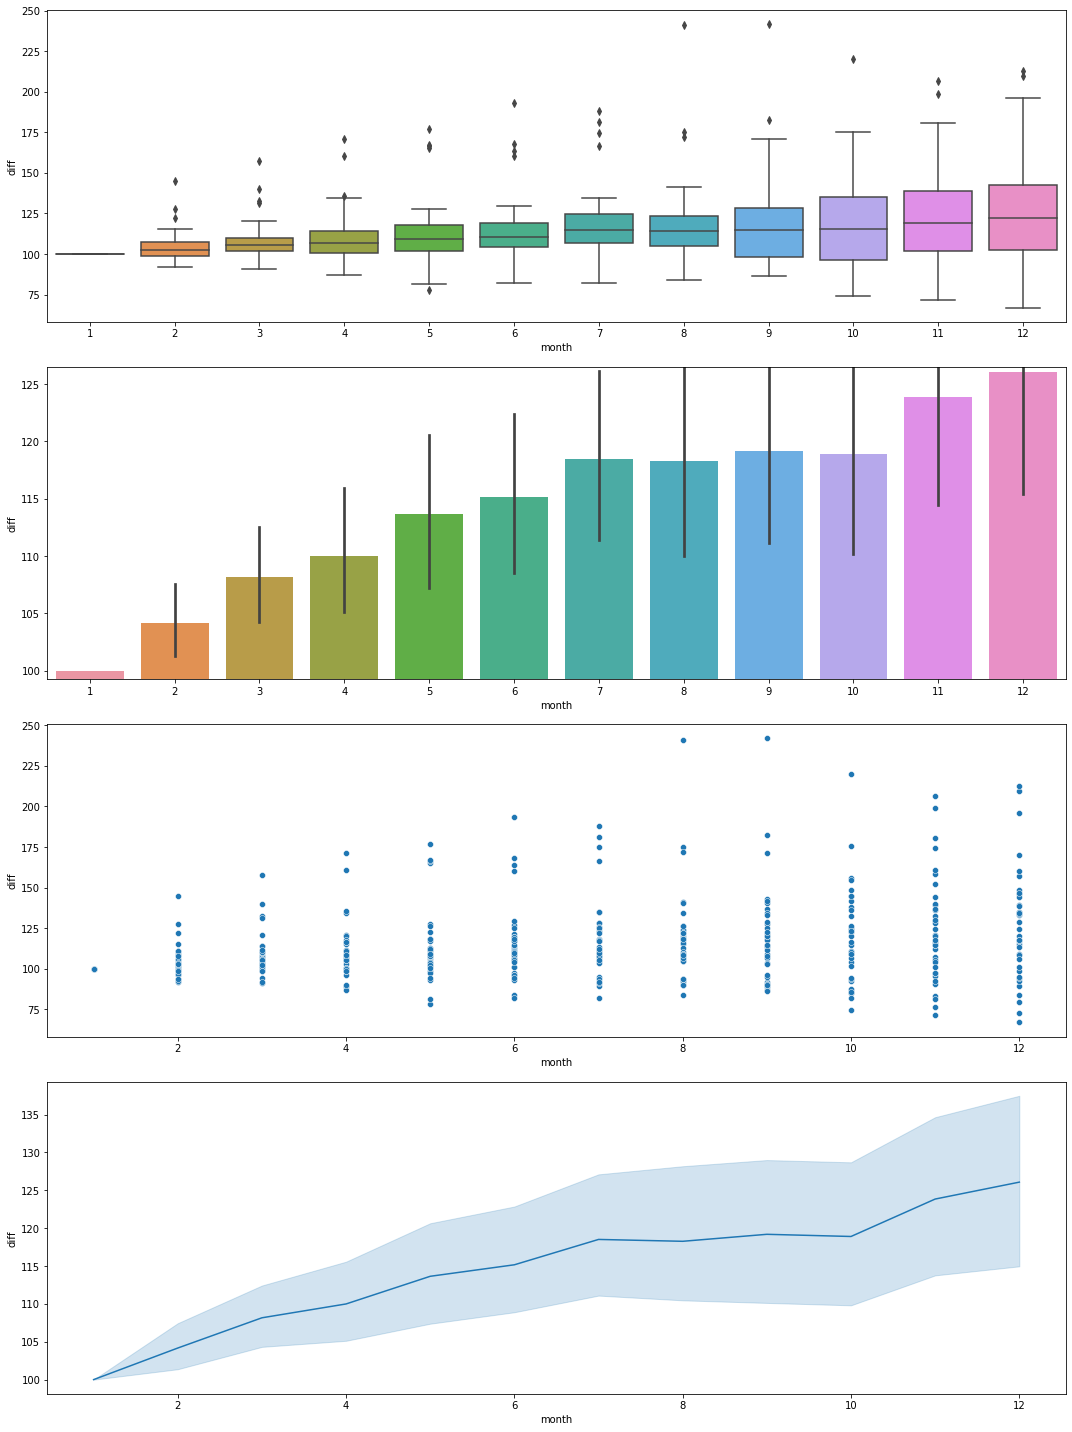

In [11]:
plot(x='month', y='diff', data=df)


In [12]:
from analysis import get_best_weekday


df = get_best_weekday("sp500.csv", limit=LIMIT)

df

[*********************100%***********************]  5 of 5 completed


,year,week,weekday,diff
249,2011,52,1,100.0
250,2011,52,2,100.322461
251,2011,52,3,99.982082
252,2011,52,4,100.447866
1,2011,1,0,100.0
...,...,...,...,...
2003,2018,51,0,100.0
2004,2018,51,1,103.289793
2005,2018,51,2,104.257374
2006,2018,51,3,102.539911


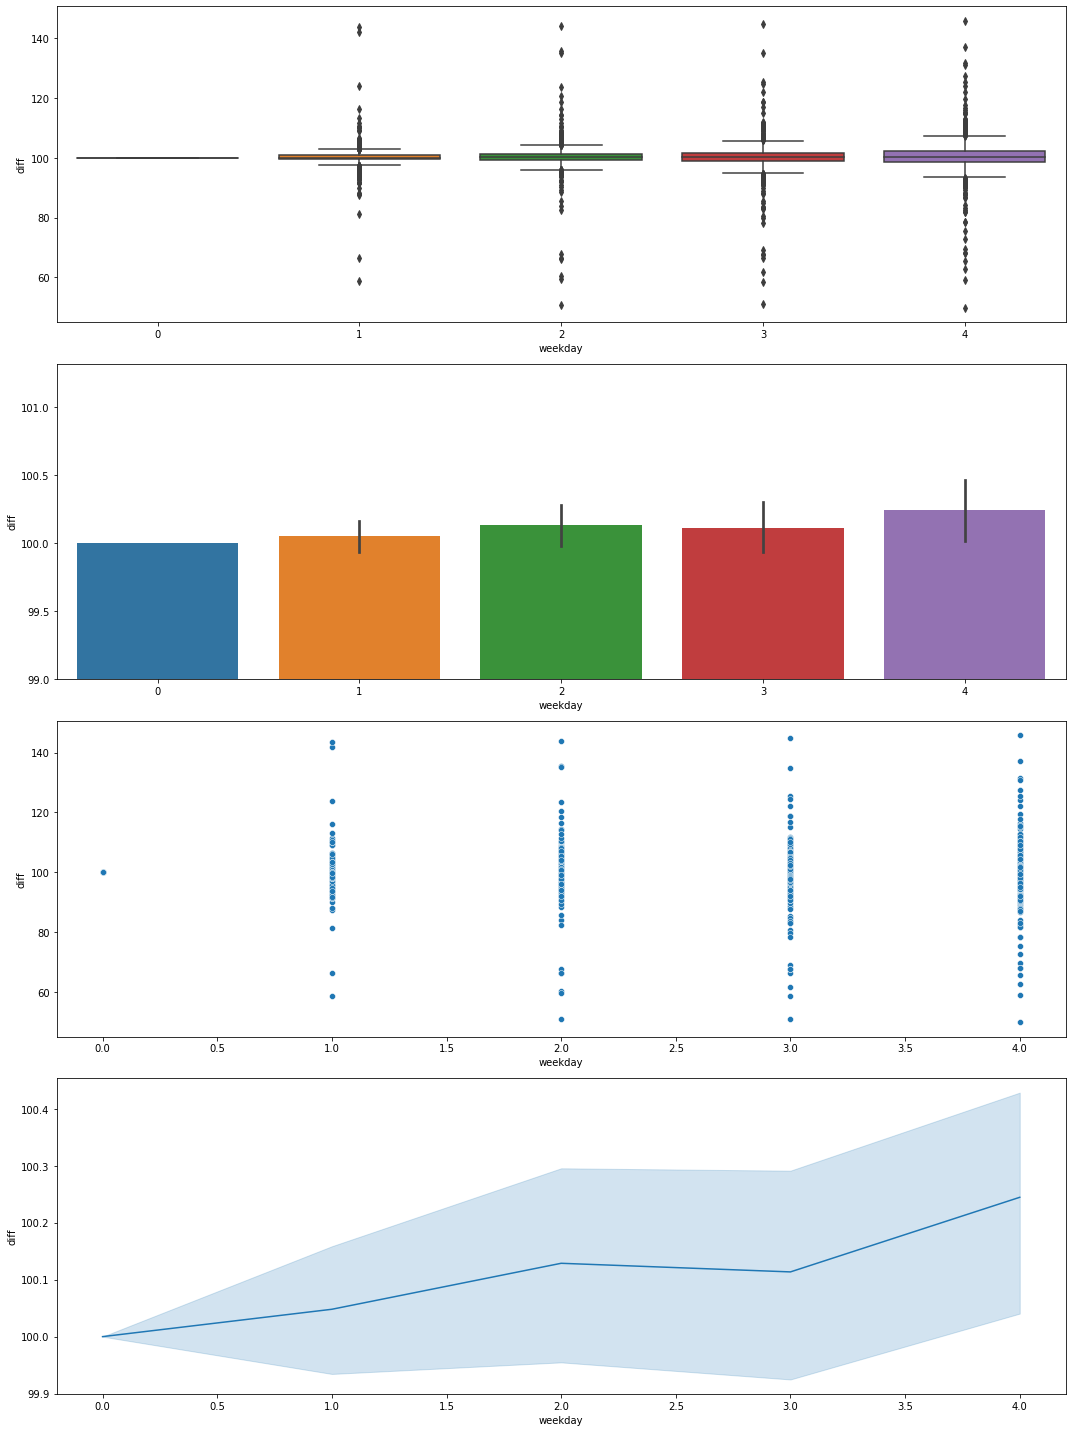

In [13]:
plot(x='weekday', y='diff', data=df)